In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
CCdata = pd.read_csv("creditcard.csv")

In [4]:
CCdata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#Here, Class of 1 indicates a fraudulent charge
CCdata['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### Class Imbalance Analysis
- **Findings:** The dataset shows a significant imbalance with 284,315 non-fraudulent transactions and only 492 fraudulent ones.
- **Implications:** This imbalance can lead to a biased model that performs well on the majority class but poorly on the minority class. To address this, we will:
  - **Resample the Data:** Use oversampling or undersampling techniques to balance the class distribution.
  - **Adjust Evaluation Metrics:** Focus on metrics like precision, recall, F1-score, and ROC AUC instead of accuracy.
  - **Consider Algorithm Choice:** Use algorithms that handle imbalance better or adjust class weights in the models.

These steps will help ensure that our model is effective in detecting fraudulent transactions despite the imbalance.


In [6]:
#Separate the data to create a training model
x = CCdata.drop('Class', axis=1)
y = CCdata['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 42, stratify=y)

In [7]:
#Scale the data
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [8]:
#Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [9]:
#predict on the test set
y_pred_log_reg = log_reg.predict(x_test)

In [10]:
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)

In [11]:
# Print Logistic Regression metrics
print(f'Logistic Regression - Confusion Matrix:\n{conf_matrix_log_reg}')
print(f'Logistic Regression - Accuracy: {accuracy_log_reg}')
print(f'Logistic Regression - Precision: {precision_log_reg}')
print(f'Logistic Regression - Recall: {recall_log_reg}')
print(f'Logistic Regression - F1 Score: {f1_log_reg}')
print(f'Logistic Regression - ROC AUC: {roc_auc_log_reg}')

Logistic Regression - Confusion Matrix:
[[56851    13]
 [   34    64]]
Logistic Regression - Accuracy: 0.9991748885221726
Logistic Regression - Precision: 0.8311688311688312
Logistic Regression - Recall: 0.6530612244897959
Logistic Regression - F1 Score: 0.7314285714285713
Logistic Regression - ROC AUC: 0.8264163044227257


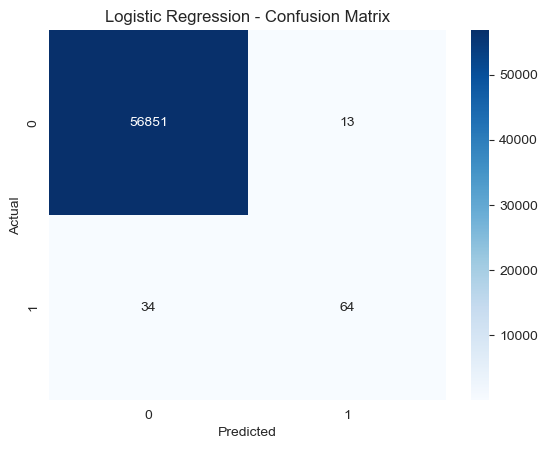

In [12]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

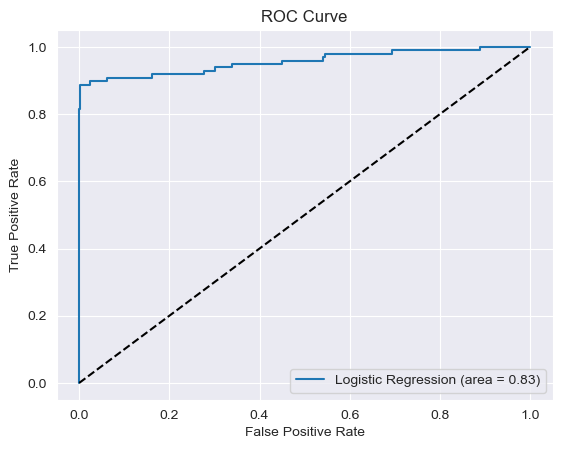

In [13]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [14]:
# Train the Random Forest model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [15]:
# Predict on the test set
y_pred_rf = rf.predict(x_test)

In [16]:
# Evaluate the Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

In [17]:
# Print Random Forest metrics
print(f'Random Forest - Confusion Matrix:\n{conf_matrix_rf}')
print(f'Random Forest - Accuracy: {accuracy_rf}')
print(f'Random Forest - Precision: {precision_rf}')
print(f'Random Forest - Recall: {recall_rf}')
print(f'Random Forest - F1 Score: {f1_rf}')
print(f'Random Forest - ROC AUC: {roc_auc_rf}')

Random Forest - Confusion Matrix:
[[56858     6]
 [   17    81]]
Random Forest - Accuracy: 0.9995962220427653
Random Forest - Precision: 0.9310344827586207
Random Forest - Recall: 0.826530612244898
Random Forest - F1 Score: 0.8756756756756757
Random Forest - ROC AUC: 0.9132125486660618


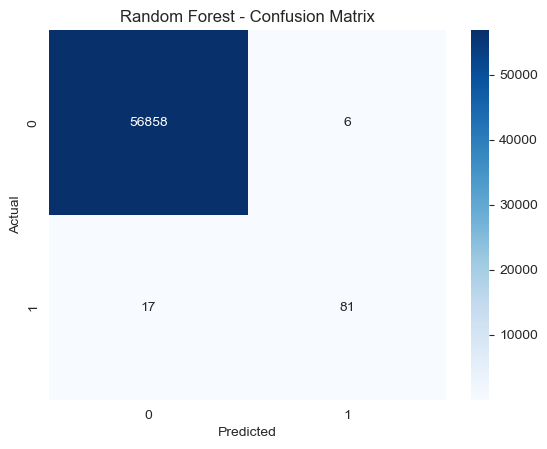

In [18]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()

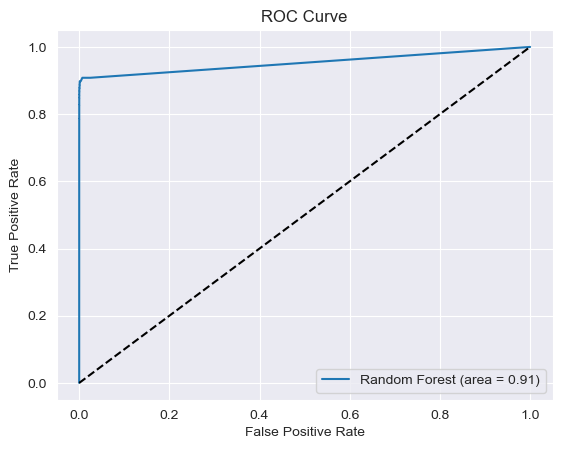

In [19]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Now I want to apply different resampling techniques and see how they compare.

In [20]:
# Resample the training data using SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [21]:
y_train_smote.value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

In [22]:
#Train logistic regression model
log_reg_smote = LogisticRegression()
log_reg_smote.fit(x_train_smote, y_train_smote)

LogisticRegression()

In [23]:
#predict on the test set
y_pred_log_reg_smote = log_reg_smote.predict(x_test)

In [24]:
conf_matrix_log_reg_smote = confusion_matrix(y_test, y_pred_log_reg_smote)
accuracy_log_reg_smote = accuracy_score(y_test, y_pred_log_reg_smote)
precision_log_reg_smote = precision_score(y_test, y_pred_log_reg_smote)
recall_log_reg_smote = recall_score(y_test, y_pred_log_reg_smote)
f1_log_reg_smote = f1_score(y_test, y_pred_log_reg_smote)
roc_auc_log_reg_smote = roc_auc_score(y_test, y_pred_log_reg_smote)

In [25]:
# Print Logistic Regression metrics
print(f'Logistic Regression SMOTE - Confusion Matrix:\n{conf_matrix_log_reg_smote}')
print(f'Logistic Regression SMOTE - Accuracy: {accuracy_log_reg_smote}')
print(f'Logistic Regression SMOTE - Precision: {precision_log_reg_smote}')
print(f'Logistic Regression SMOTE - Recall: {recall_log_reg_smote}')
print(f'Logistic Regression SMOTE - F1 Score: {f1_log_reg_smote}')
print(f'Logistic Regression SMOTE - ROC AUC: {roc_auc_log_reg_smote}')

Logistic Regression SMOTE - Confusion Matrix:
[[55401  1463]
 [    8    90]]
Logistic Regression SMOTE - Accuracy: 0.9741757663003405
Logistic Regression SMOTE - Precision: 0.05795235028976175
Logistic Regression SMOTE - Recall: 0.9183673469387755
Logistic Regression SMOTE - F1 Score: 0.10902483343428225
Logistic Regression SMOTE - ROC AUC: 0.9463196470203162


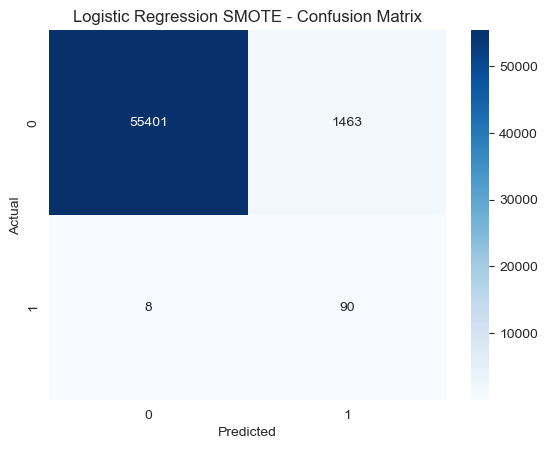

In [26]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix_log_reg_smote, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression SMOTE - Confusion Matrix')
plt.show()

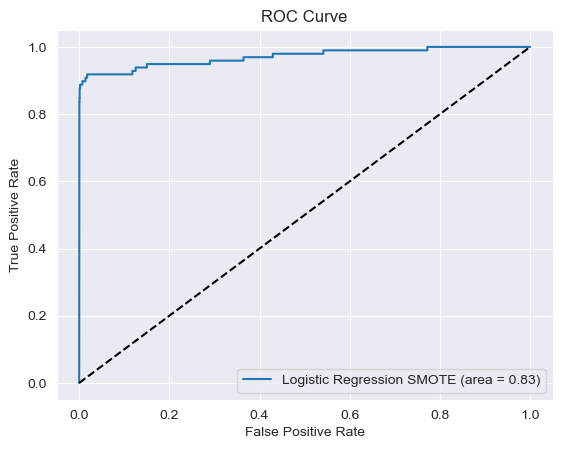

In [27]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg_smote.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression SMOTE (area = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [28]:
# Train the Random Forest model
rf_smote = RandomForestClassifier()
rf_smote.fit(x_train_smote, y_train_smote)

RandomForestClassifier()

In [29]:
# Predict on the test set
y_pred_rf_smote = rf_smote.predict(x_test)

In [30]:
# Evaluate the Random Forest model
conf_matrix_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)
accuracy_rf_smote = accuracy_score(y_test, y_pred_rf_smote)
precision_rf_smote = precision_score(y_test, y_pred_rf_smote)
recall_rf_smote = recall_score(y_test, y_pred_rf_smote)
f1_rf_smote = f1_score(y_test, y_pred_rf_smote)
roc_auc_rf_smote = roc_auc_score(y_test, y_pred_rf_smote)

In [31]:
# Print Random Forest metrics
print(f'Random Forest SMOTE - Confusion Matrix:\n{conf_matrix_rf_smote}')
print(f'Random Forest SMOTE - Accuracy: {accuracy_rf_smote}')
print(f'Random Forest SMOTE - Precision: {precision_rf_smote}')
print(f'Random Forest SMOTE - Recall: {recall_rf_smote}')
print(f'Random Forest SMOTE - F1 Score: {f1_rf_smote}')
print(f'Random Forest SMOTE - ROC AUC: {roc_auc_rf_smote}')

Random Forest SMOTE - Confusion Matrix:
[[56852    12]
 [   18    80]]
Random Forest SMOTE - Accuracy: 0.9994733330992591
Random Forest SMOTE - Precision: 0.8695652173913043
Random Forest SMOTE - Recall: 0.8163265306122449
Random Forest SMOTE - F1 Score: 0.8421052631578948
Random Forest SMOTE - ROC AUC: 0.9080577503933481


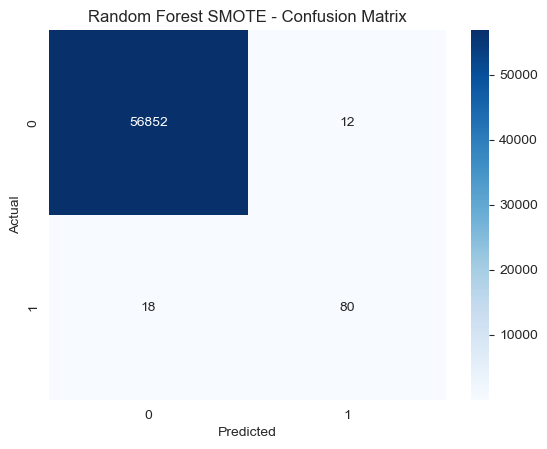

In [32]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix_rf_smote, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest SMOTE - Confusion Matrix')
plt.show()

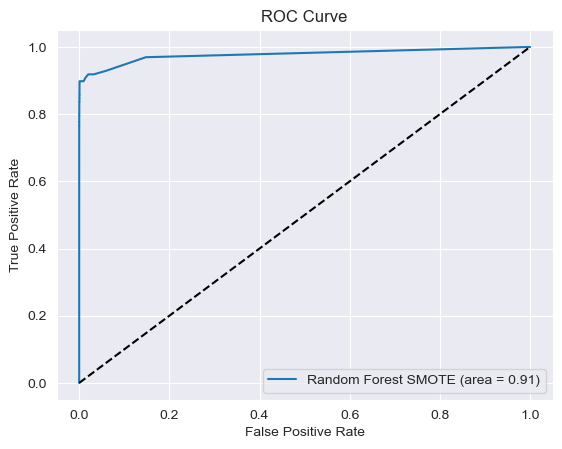

In [33]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_smote.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='Random Forest SMOTE (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [35]:
# Resample the training data using ADASYN
adasyn = ADASYN(random_state=42)
x_train_adasyn, y_train_adasyn = adasyn.fit_resample(x_train, y_train)

In [36]:
y_train_adasyn.value_counts()

Class
1    227457
0    227451
Name: count, dtype: int64

In [37]:
#Train logistic regression model
log_reg_adasyn = LogisticRegression()
log_reg_adasyn.fit(x_train_adasyn, y_train_adasyn)

LogisticRegression()

In [38]:
#predict on the test set
y_pred_log_reg_adasyn = log_reg_adasyn.predict(x_test)

In [39]:
conf_matrix_log_reg_adasyn = confusion_matrix(y_test, y_pred_log_reg_adasyn)
accuracy_log_reg_adasyn = accuracy_score(y_test, y_pred_log_reg_adasyn)
precision_log_reg_adasyn = precision_score(y_test, y_pred_log_reg_adasyn)
recall_log_reg_adasyn = recall_score(y_test, y_pred_log_reg_adasyn)
f1_log_reg_adasyn = f1_score(y_test, y_pred_log_reg_adasyn)
roc_auc_log_reg_adasyn = roc_auc_score(y_test, y_pred_log_reg_adasyn)

In [40]:
# Print Logistic Regression metrics
print(f'Logistic Regression ADASYN - Confusion Matrix:\n{conf_matrix_log_reg_adasyn}')
print(f'Logistic Regression ADASYN - Accuracy: {accuracy_log_reg_adasyn}')
print(f'Logistic Regression ADASYN - Precision: {precision_log_reg_adasyn}')
print(f'Logistic Regression ADASYN - Recall: {recall_log_reg_adasyn}')
print(f'Logistic Regression ADASYN - F1 Score: {f1_log_reg_adasyn}')
print(f'Logistic Regression ADASYN - ROC AUC: {roc_auc_log_reg_adasyn}')

Logistic Regression ADASYN - Confusion Matrix:
[[52131  4733]
 [    8    90]]
Logistic Regression ADASYN - Accuracy: 0.9167690741195885
Logistic Regression ADASYN - Precision: 0.018660584698320548
Logistic Regression ADASYN - Recall: 0.9183673469387755
Logistic Regression ADASYN - F1 Score: 0.036577931314773424
Logistic Regression ADASYN - ROC AUC: 0.917566833289309


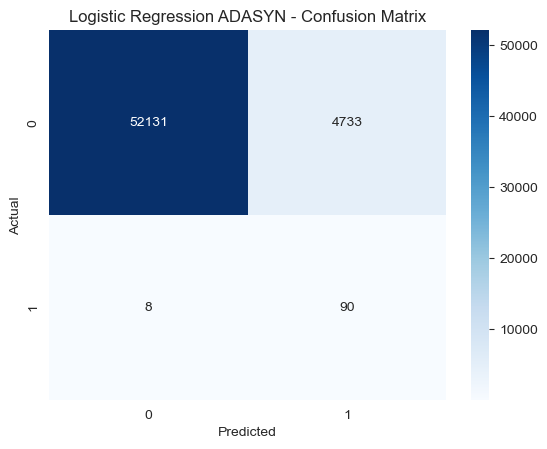

In [41]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix_log_reg_adasyn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression ADASYN - Confusion Matrix')
plt.show()

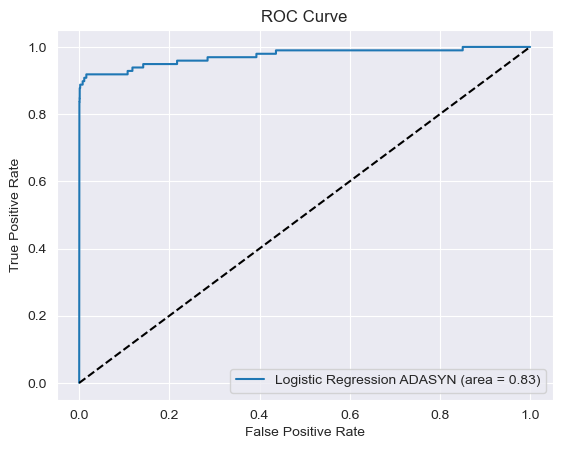

In [42]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg_adasyn.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression ADASYN (area = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [43]:
# Train the Random Forest model
rf_adasyn = RandomForestClassifier()
rf_adasyn.fit(x_train_adasyn, y_train_adasyn)

RandomForestClassifier()

In [44]:
# Predict on the test set
y_pred_rf_adasyn = rf_adasyn.predict(x_test)

In [45]:
# Evaluate the Random Forest model
conf_matrix_rf_adasyn = confusion_matrix(y_test, y_pred_rf_adasyn)
accuracy_rf_adasyn = accuracy_score(y_test, y_pred_rf_adasyn)
precision_rf_adasyn = precision_score(y_test, y_pred_rf_adasyn)
recall_rf_adasyn = recall_score(y_test, y_pred_rf_adasyn)
f1_rf_adasyn = f1_score(y_test, y_pred_rf_adasyn)
roc_auc_rf_adasyn = roc_auc_score(y_test, y_pred_rf_adasyn)

In [46]:
# Print Random Forest metrics
print(f'Random Forest ADASYN - Confusion Matrix:\n{conf_matrix_rf_adasyn}')
print(f'Random Forest ADASYN - Accuracy: {accuracy_rf_adasyn}')
print(f'Random Forest ADASYN - Precision: {precision_rf_adasyn}')
print(f'Random Forest ADASYN - Recall: {recall_rf_adasyn}')
print(f'Random Forest ADASYN - F1 Score: {f1_rf_adasyn}')
print(f'Random Forest ADASYN - ROC AUC: {roc_auc_rf_adasyn}')

Random Forest ADASYN - Confusion Matrix:
[[56852    12]
 [   20    78]]
Random Forest ADASYN - Accuracy: 0.9994382219725431
Random Forest ADASYN - Precision: 0.8666666666666667
Random Forest ADASYN - Recall: 0.7959183673469388
Random Forest ADASYN - F1 Score: 0.8297872340425533
Random Forest ADASYN - ROC AUC: 0.8978536687606951


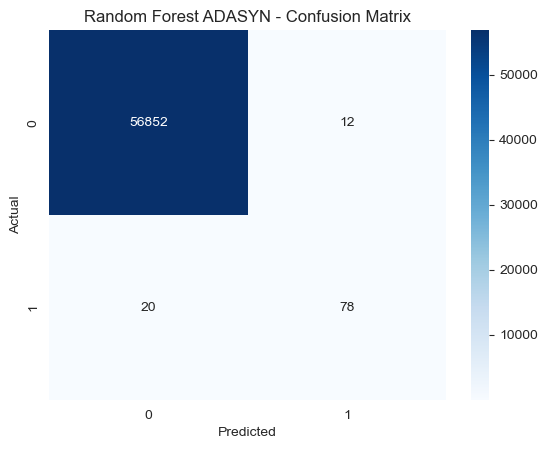

In [47]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix_rf_adasyn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest ADASYN - Confusion Matrix')
plt.show()

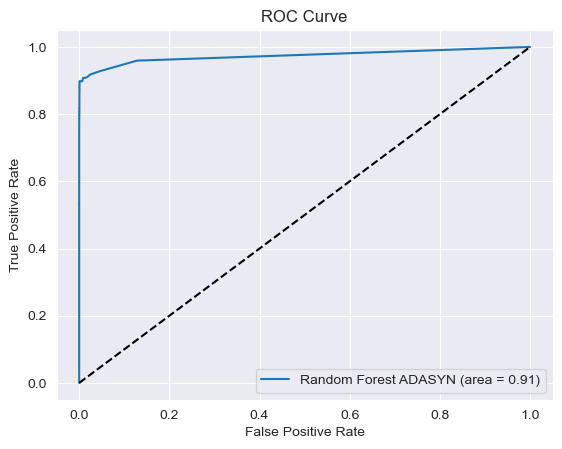

In [48]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_adasyn.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='Random Forest ADASYN (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [50]:
# Resample the training data using SMOTE TOMEK
smote_tomek = SMOTETomek(random_state=42)
x_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(x_train, y_train)

In [51]:
y_train_smote_tomek.value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

In [52]:
#Train logistic regression model
log_reg_smote_tomek = LogisticRegression()
log_reg_smote_tomek.fit(x_train_smote_tomek, y_train_smote_tomek)

LogisticRegression()

In [53]:
#predict on the test set
y_pred_log_reg_smote_tomek = log_reg_smote_tomek.predict(x_test)

In [54]:
conf_matrix_log_reg_smote_tomek = confusion_matrix(y_test, y_pred_log_reg_smote_tomek)
accuracy_log_reg_smote_tomek = accuracy_score(y_test, y_pred_log_reg_smote_tomek)
precision_log_reg_smote_tomek = precision_score(y_test, y_pred_log_reg_smote_tomek)
recall_log_reg_smote_tomek = recall_score(y_test, y_pred_log_reg_smote_tomek)
f1_log_reg_smote_tomek = f1_score(y_test, y_pred_log_reg_smote_tomek)
roc_auc_log_reg_smote_tomek = roc_auc_score(y_test, y_pred_log_reg_smote_tomek)

In [55]:
# Print Logistic Regression metrics
print(f'Logistic Regression SMOTE TOMEK - Confusion Matrix:\n{conf_matrix_log_reg_smote_tomek}')
print(f'Logistic Regression SMOTE TOMEK - Accuracy: {accuracy_log_reg_smote_tomek}')
print(f'Logistic Regression SMOTE TOMEK - Precision: {precision_log_reg_smote_tomek}')
print(f'Logistic Regression SMOTE TOMEK - Recall: {recall_log_reg_smote_tomek}')
print(f'Logistic Regression SMOTE TOMEK - F1 Score: {f1_log_reg_smote_tomek}')
print(f'Logistic Regression SMOTE TOMEK - ROC AUC: {roc_auc_log_reg_smote_tomek}')

Logistic Regression SMOTE TOMEK - Confusion Matrix:
[[55401  1463]
 [    8    90]]
Logistic Regression SMOTE TOMEK - Accuracy: 0.9741757663003405
Logistic Regression SMOTE TOMEK - Precision: 0.05795235028976175
Logistic Regression SMOTE TOMEK - Recall: 0.9183673469387755
Logistic Regression SMOTE TOMEK - F1 Score: 0.10902483343428225
Logistic Regression SMOTE TOMEK - ROC AUC: 0.9463196470203162


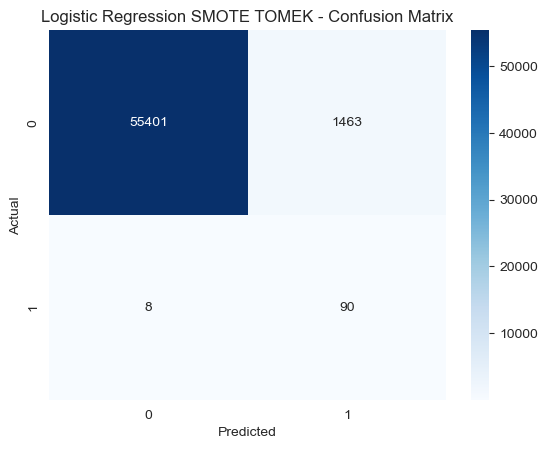

In [56]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix_log_reg_smote_tomek, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression SMOTE TOMEK - Confusion Matrix')
plt.show()

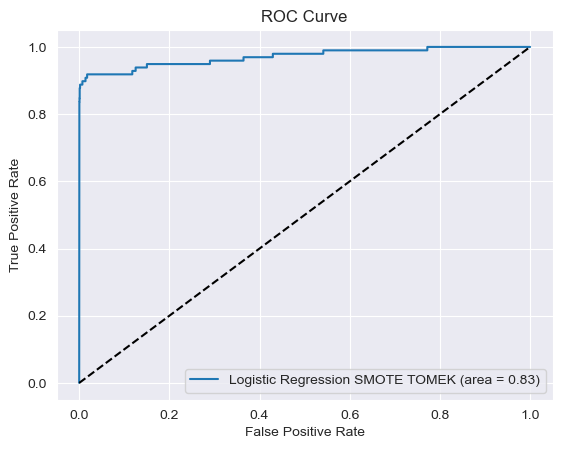

In [57]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg_smote_tomek.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression SMOTE TOMEK (area = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [58]:
# Train the Random Forest model
rf_smote_tomek = RandomForestClassifier()
rf_smote_tomek.fit(x_train_smote_tomek, y_train_smote_tomek)

RandomForestClassifier()

In [59]:
# Predict on the test set
y_pred_rf_smote_tomek = rf_smote_tomek.predict(x_test)

In [60]:
# Evaluate the Random Forest model
conf_matrix_rf_smote_tomek = confusion_matrix(y_test, y_pred_rf_smote_tomek)
accuracy_rf_smote_tomek = accuracy_score(y_test, y_pred_rf_smote_tomek)
precision_rf_smote_tomek = precision_score(y_test, y_pred_rf_smote_tomek)
recall_rf_smote_tomek = recall_score(y_test, y_pred_rf_smote_tomek)
f1_rf_smote_tomek = f1_score(y_test, y_pred_rf_smote_tomek)
roc_auc_rf_smote_tomek = roc_auc_score(y_test, y_pred_rf_smote_tomek)

In [61]:
# Print Random Forest metrics
print(f'Random Forest SMOTE TOMEK - Confusion Matrix:\n{conf_matrix_rf_smote_tomek}')
print(f'Random Forest SMOTE TOMEK - Accuracy: {accuracy_rf_smote_tomek}')
print(f'Random Forest SMOTE TOMEK - Precision: {precision_rf_smote_tomek}')
print(f'Random Forest SMOTE TOMEK - Recall: {recall_rf_smote_tomek}')
print(f'Random Forest SMOTE TOMEK - F1 Score: {f1_rf_smote_tomek}')
print(f'Random Forest SMOTE TOMEK - ROC AUC: {roc_auc_rf_smote_tomek}')

Random Forest SMOTE TOMEK - Confusion Matrix:
[[56854    10]
 [   18    80]]
Random Forest SMOTE TOMEK - Accuracy: 0.9995084442259752
Random Forest SMOTE TOMEK - Precision: 0.8888888888888888
Random Forest SMOTE TOMEK - Recall: 0.8163265306122449
Random Forest SMOTE TOMEK - F1 Score: 0.851063829787234
Random Forest SMOTE TOMEK - ROC AUC: 0.9080753362121439


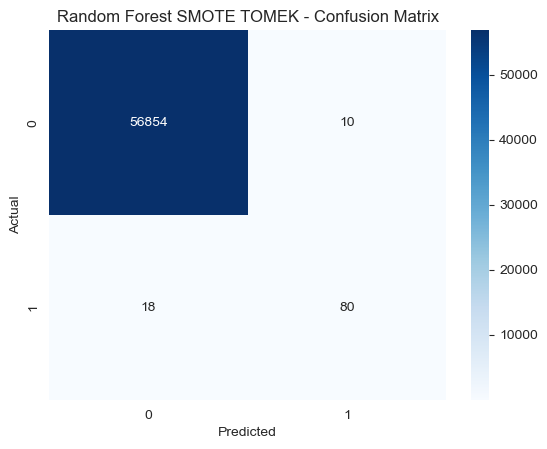

In [62]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix_rf_smote_tomek, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest SMOTE TOMEK - Confusion Matrix')
plt.show()

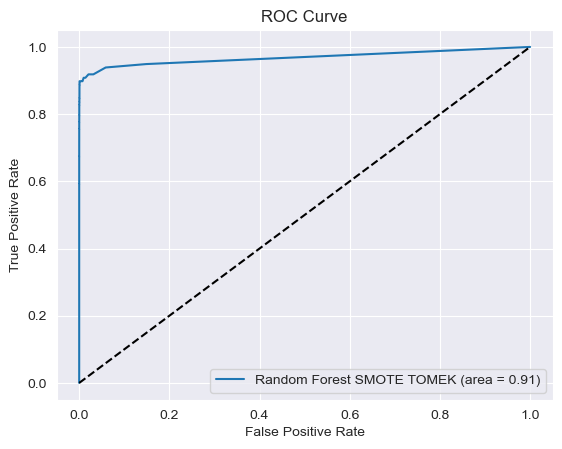

In [63]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_smote_tomek.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='Random Forest SMOTE TOMEK (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [65]:
# Resample the training data using SMOTE ENN
smote_enn = SMOTEENN(random_state=42)
x_train_smote_enn, y_train_smote_enn = smote_enn.fit_resample(x_train, y_train)

In [66]:
y_train_smote_enn.value_counts()

Class
1    227451
0    227058
Name: count, dtype: int64

In [67]:
#Train logistic regression model
log_reg_smote_enn = LogisticRegression()
log_reg_smote_enn.fit(x_train_smote_enn, y_train_smote_enn)

LogisticRegression()

In [68]:
#predict on the test set
y_pred_log_reg_smote_enn = log_reg_smote_enn.predict(x_test)

In [69]:
conf_matrix_log_reg_smote_enn = confusion_matrix(y_test, y_pred_log_reg_smote_enn)
accuracy_log_reg_smote_enn = accuracy_score(y_test, y_pred_log_reg_smote_enn)
precision_log_reg_smote_enn = precision_score(y_test, y_pred_log_reg_smote_enn)
recall_log_reg_smote_enn = recall_score(y_test, y_pred_log_reg_smote_enn)
f1_log_reg_smote_enn = f1_score(y_test, y_pred_log_reg_smote_enn)
roc_auc_log_reg_smote_enn = roc_auc_score(y_test, y_pred_log_reg_smote_enn)

In [70]:
# Print Logistic Regression metrics
print(f'Logistic Regression SMOTE ENN - Confusion Matrix:\n{conf_matrix_log_reg_smote_enn}')
print(f'Logistic Regression SMOTE ENN - Accuracy: {accuracy_log_reg_smote_enn}')
print(f'Logistic Regression SMOTE ENN - Precision: {precision_log_reg_smote_enn}')
print(f'Logistic Regression SMOTE ENN - Recall: {recall_log_reg_smote_enn}')
print(f'Logistic Regression SMOTE ENN - F1 Score: {f1_log_reg_smote_enn}')
print(f'Logistic Regression SMOTE ENN - ROC AUC: {roc_auc_log_reg_smote_enn}')

Logistic Regression SMOTE ENN - Confusion Matrix:
[[55346  1518]
 [    8    90]]
Logistic Regression SMOTE ENN - Accuracy: 0.973210210315649
Logistic Regression SMOTE ENN - Precision: 0.055970149253731345
Logistic Regression SMOTE ENN - Recall: 0.9183673469387755
Logistic Regression SMOTE ENN - F1 Score: 0.10550996483001172
Logistic Regression SMOTE ENN - ROC AUC: 0.945836037003434


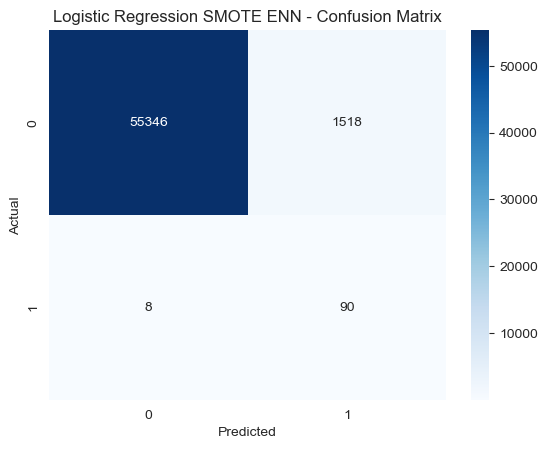

In [71]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix_log_reg_smote_enn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression SMOTE ENN - Confusion Matrix')
plt.show()

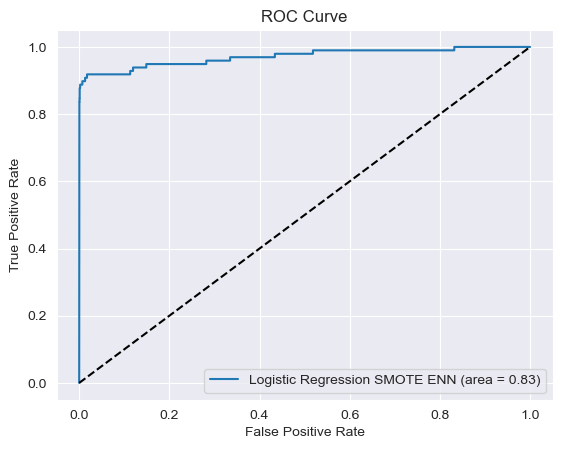

In [72]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg_smote_enn.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression SMOTE ENN (area = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [73]:
# Train the Random Forest model
rf_smote_enn = RandomForestClassifier()
rf_smote_enn.fit(x_train_smote_enn, y_train_smote_enn)

RandomForestClassifier()

In [74]:
# Predict on the test set
y_pred_rf_smote_enn = rf_smote_enn.predict(x_test)

In [75]:
# Evaluate the Random Forest model
conf_matrix_rf_smote_enn = confusion_matrix(y_test, y_pred_rf_smote_enn)
accuracy_rf_smote_enn = accuracy_score(y_test, y_pred_rf_smote_enn)
precision_rf_smote_enn = precision_score(y_test, y_pred_rf_smote_enn)
recall_rf_smote_enn = recall_score(y_test, y_pred_rf_smote_enn)
f1_rf_smote_enn = f1_score(y_test, y_pred_rf_smote_enn)
roc_auc_rf_smote_enn = roc_auc_score(y_test, y_pred_rf_smote_enn)

In [76]:
# Print Random Forest metrics
print(f'Random Forest SMOTE ENN - Confusion Matrix:\n{conf_matrix_rf_smote_enn}')
print(f'Random Forest SMOTE ENN - Accuracy: {accuracy_rf_smote_enn}')
print(f'Random Forest SMOTE ENN - Precision: {precision_rf_smote_enn}')
print(f'Random Forest SMOTE ENN - Recall: {recall_rf_smote_enn}')
print(f'Random Forest SMOTE ENN - F1 Score: {f1_rf_smote_enn}')
print(f'Random Forest SMOTE ENN - ROC AUC: {roc_auc_rf_smote_enn}')

Random Forest SMOTE ENN - Confusion Matrix:
[[56842    22]
 [   17    81]]
Random Forest SMOTE ENN - Accuracy: 0.9993153330290369
Random Forest SMOTE ENN - Precision: 0.7864077669902912
Random Forest SMOTE ENN - Recall: 0.826530612244898
Random Forest SMOTE ENN - F1 Score: 0.8059701492537313
Random Forest SMOTE ENN - ROC AUC: 0.9130718621156959


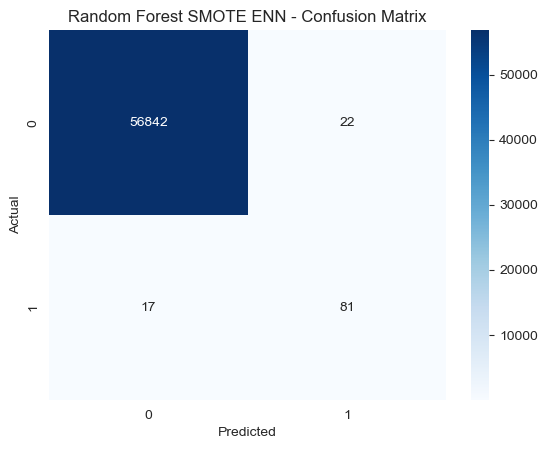

In [77]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix_rf_smote_enn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest SMOTE ENN - Confusion Matrix')
plt.show()

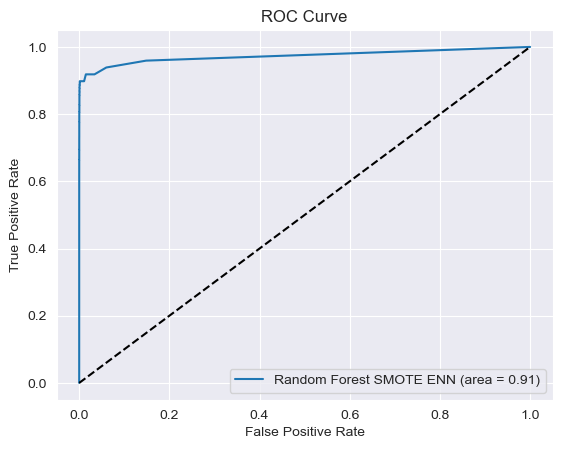

In [78]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_smote_enn.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='Random Forest SMOTE ENN (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()